# Description du Dataset:

Ce dataset présente les données clients d'une entreprise de télecommunications. Il nous présente des informations nous permettant d'identifier un risque de churn (savoir si un client reste ou non).

# Importation des bibliothèques nécessaires

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


#Chargement du fichier et affichage des premières lignes

In [5]:
file_path = '../data/Customer Churn.csv'
df = pd.read_csv(file_path)
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


# Analyse Exploratoire des Données (EDA)

In [7]:
print(df.describe())

       Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.2500

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

In [9]:
print(df.duplicated().sum())

300


In [10]:
df = df.drop_duplicates()

In [11]:
print(df.duplicated().sum())

0


In [12]:
print(df.isnull().sum())

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
FN                         0
FP                         0
Churn                      0
dtype: int64


In [13]:
cols_to_drop = [
    "Age Group",
    "Tariff Plan",
    "Status",
    "FN" ,
    "FP"
]

df= df.drop(columns=cols_to_drop)


In [14]:
print(df)

      Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3096             17          0                    17               1   
3097             13          0                    18               4   
3099              8          1                    11               2   
3123             26          0                    38               9   
3131              5          1                    38               0   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1              

### Identify les   outliers

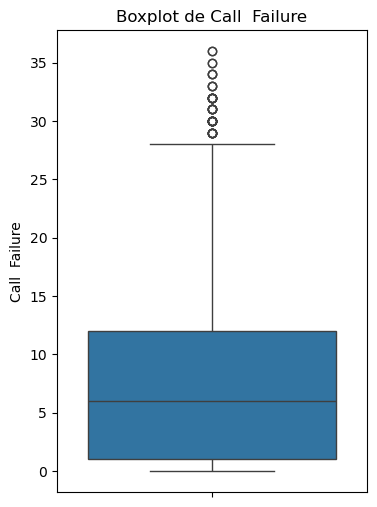

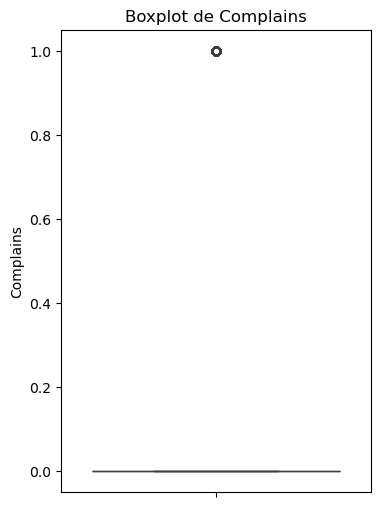

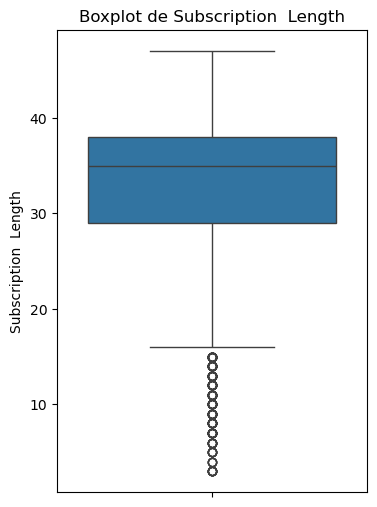

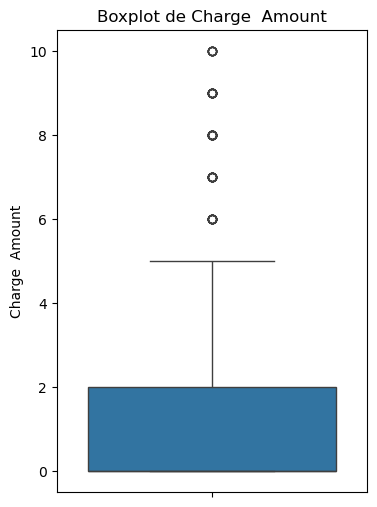

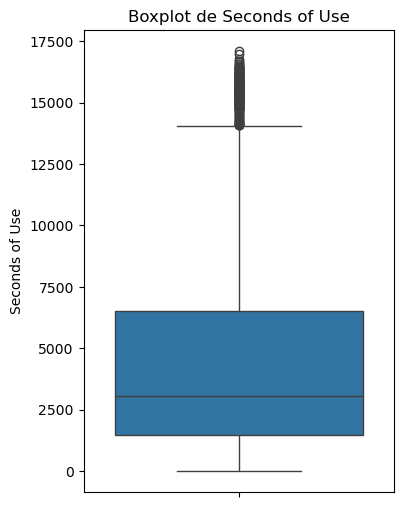

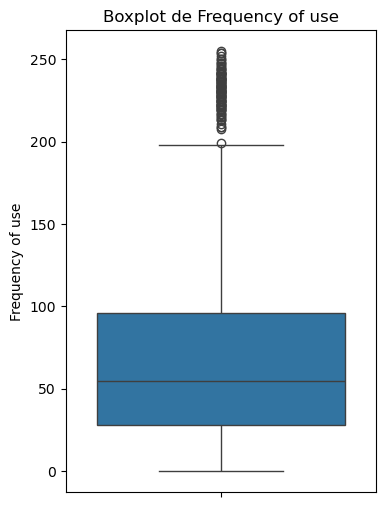

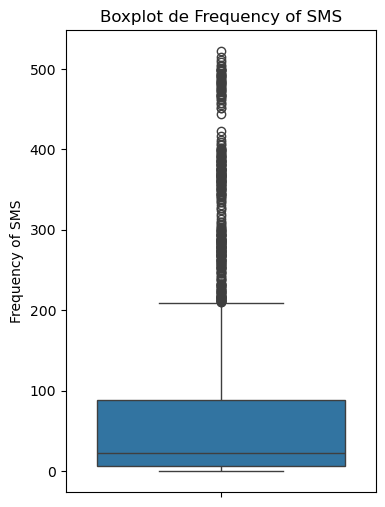

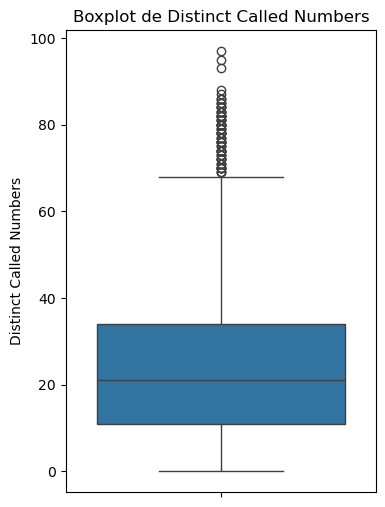

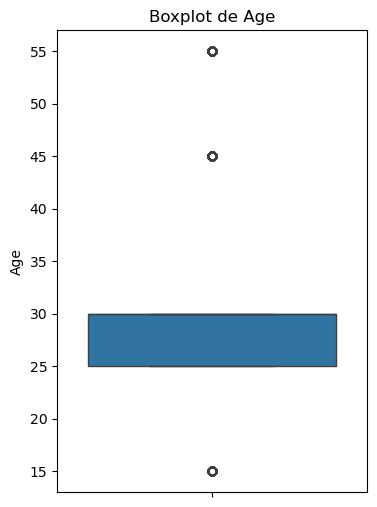

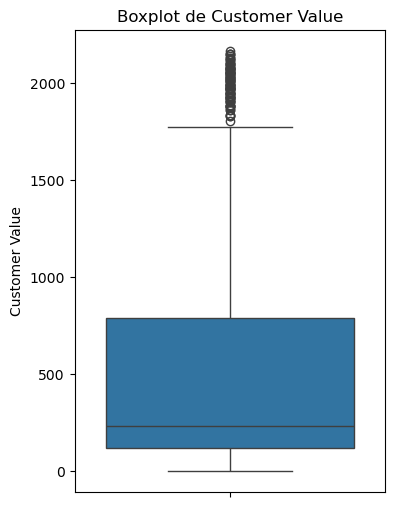

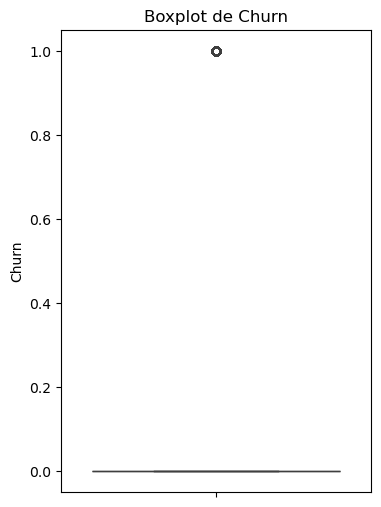

In [16]:
for col in df:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


matrice de correlation

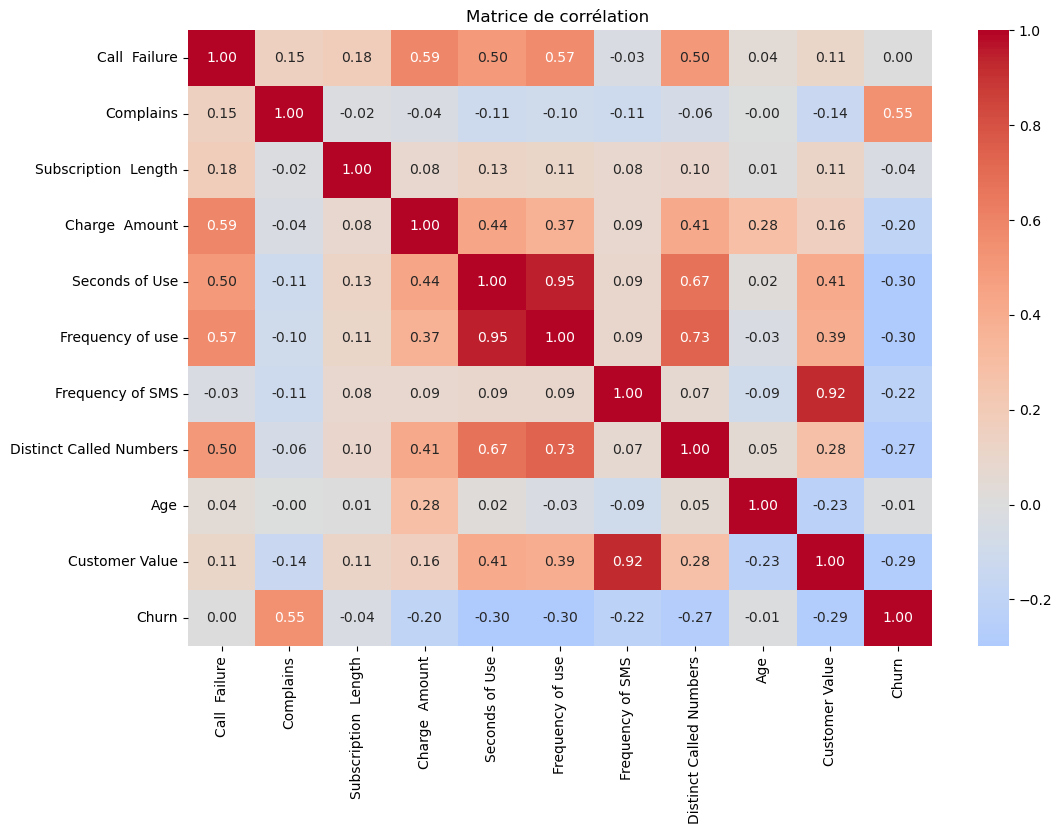

In [18]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Matrice de corrélation ")
plt.show()


Histogramme

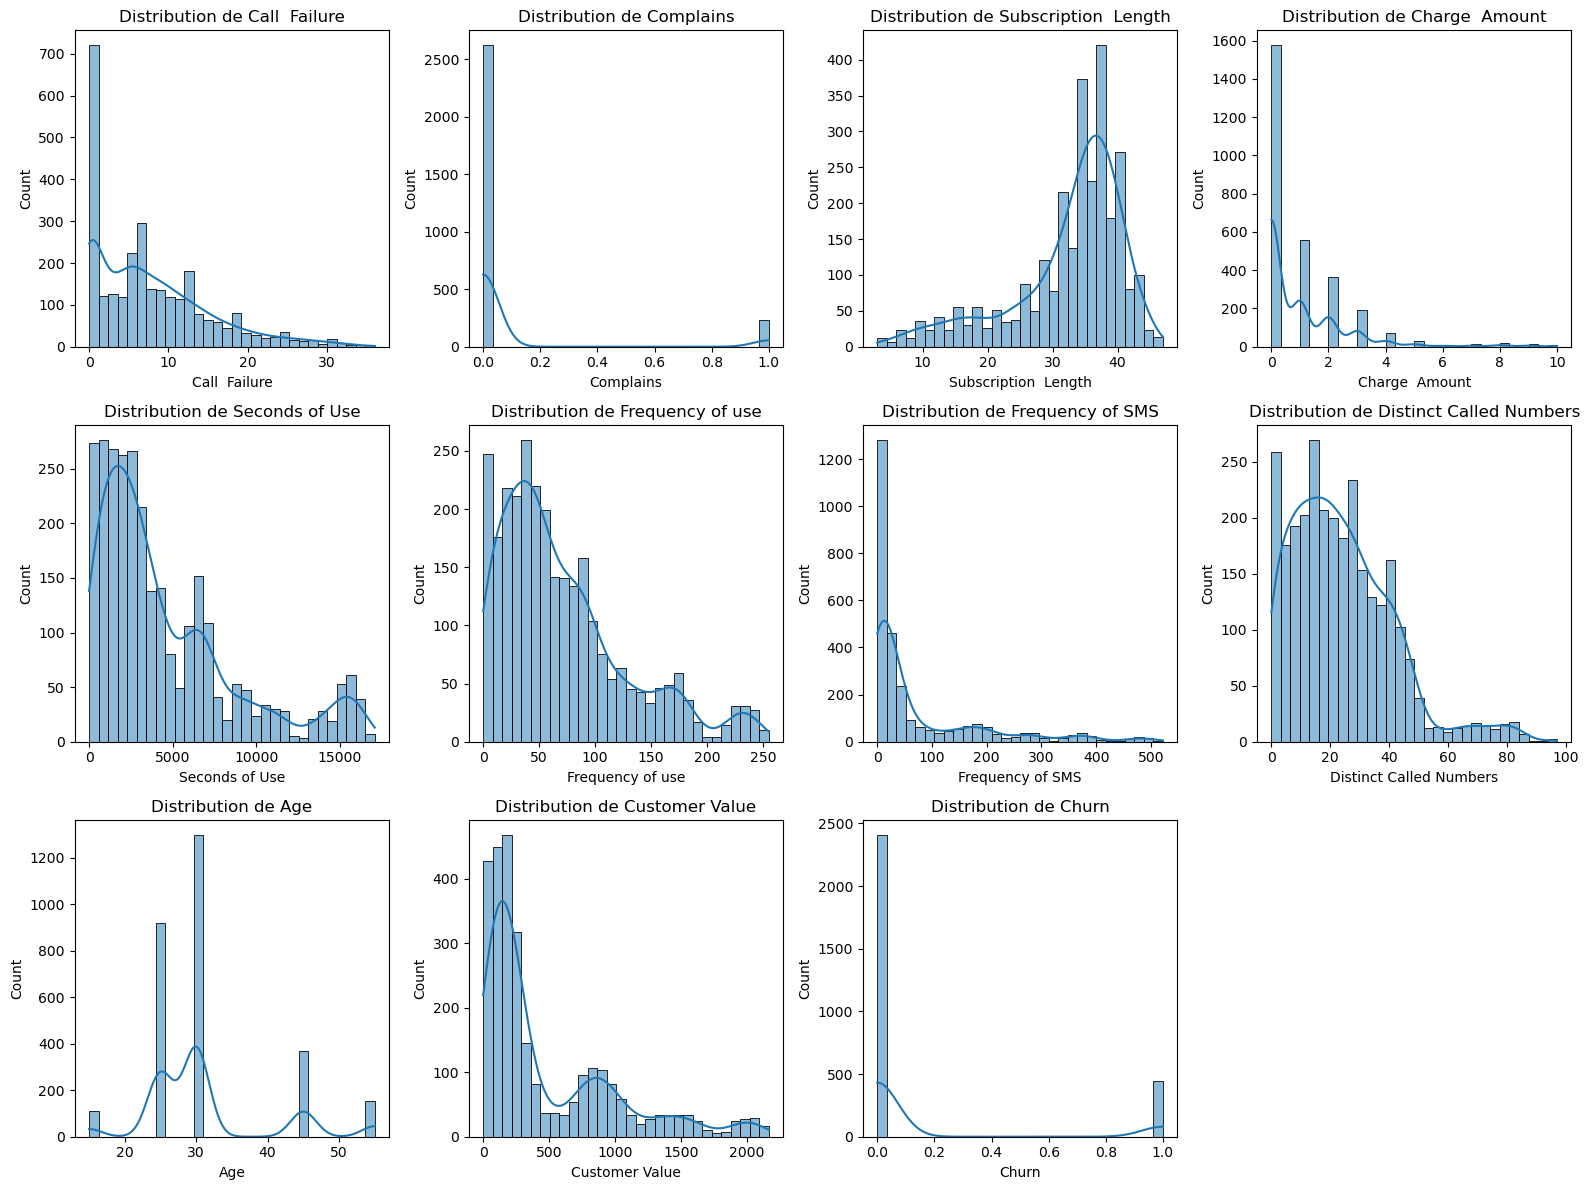

In [20]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(df, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")

plt.tight_layout()
plt.show()


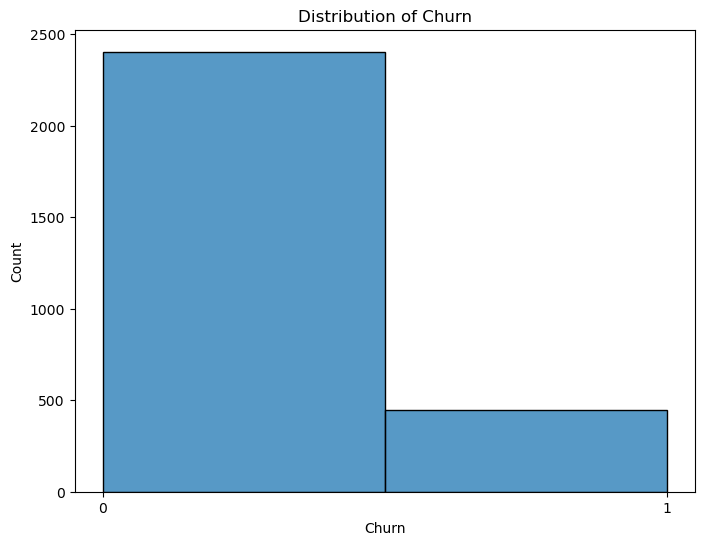

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Churn'], bins=2, kde=False)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

In [22]:
target = "Churn"
y = df[target].astype(int)
X = df.drop(columns=[target])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [24]:
print("Train y distribution:\n", y_train.value_counts(normalize=True))
print("Valid y distribution:\n", y_test.value_counts(normalize=True))

Train y distribution:
 Churn
0    0.843421
1    0.156579
Name: proportion, dtype: float64
Valid y distribution:
 Churn
0    0.84386
1    0.15614
Name: proportion, dtype: float64


In [25]:
numeric_features = [
    "Seconds of Use",
    "Frequency of use",
    "Frequency of SMS",
    "Customer Value",
    "Charge  Amount",
    "Distinct Called Numbers"
]

binary_features = ["Complains"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(np.log1p, feature_names_out="one-to-one")),
    ("scaler", RobustScaler())
])

binary_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("bin", binary_transformer, binary_features)
    ],
    remainder="drop"
)


In [26]:
pipe_lr = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])


In [27]:
pipe_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced"
    ))
])


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_gb = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", GradientBoostingClassifier(random_state=42))
])


In [29]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC-AUC :", roc_auc_score(y_test, y_proba))


In [52]:
models = {
    "Logistic Regression": pipe_lr,
    "Random Forest": pipe_rf,
    "Gradient Boosting": pipe_gb
}

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)



===== Logistic Regression =====
[[410  71]
 [ 24  65]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.90       481
           1       0.48      0.73      0.58        89

    accuracy                           0.83       570
   macro avg       0.71      0.79      0.74       570
weighted avg       0.87      0.83      0.85       570

ROC-AUC : 0.8864491111682122

===== Random Forest =====
[[468  13]
 [ 28  61]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       481
           1       0.82      0.69      0.75        89

    accuracy                           0.93       570
   macro avg       0.88      0.83      0.85       570
weighted avg       0.92      0.93      0.93       570

ROC-AUC : 0.9661636571748932

===== Gradient Boosting =====
[[476   5]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       481
           1       

In [54]:
import pickle
with open("logistic_regression_pipeline.pkl", "wb") as f:
    pickle.dump(pipe_lr, f)

with open("random_forest_pipeline.pkl", "wb") as f:
    pickle.dump(pipe_rf, f)

with open("gradient_boosting_pipeline.pkl", "wb") as f:
    pickle.dump(pipe_gb, f)

In [58]:
import os
dossier_stockage = '../models/'  

# Charger le pipeline Random Forest
chemin_fichier_rf = os.path.join(dossier_stockage, "random_forest_pipeline.pkl")

try:
    with open(chemin_fichier_rf, "rb") as f:
        loaded_model = pickle.load(f)
    print("Modèle chargé avec succès !")
except FileNotFoundError:
    print(f"Erreur : le fichier '{chemin_fichier_rf}' n'existe pas.")

Modèle chargé avec succès !


In [60]:
print(loaded_model)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Seconds of Use',
                                                   'Frequency of use',
                                                   'Frequency of SMS',
                                                   